# 동네 정보를 추가한 버전.

# 1. Load datas

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats, special

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [93]:
datas = pd.read_csv('./processed_datas/processed_data_2021.csv', encoding='cp949')
datas.index.name = 'id'
datas.head()

,Unnamed: 0,공원최단거리,도서관최단거리,초등학교최단거리,중학교최단거리,고등학교최단거리,지진옥외대피소최단거리,응급실최단거리,1.0km병원,2.5km병원,0.1km버스정류장,0.3km버스정류장,0.5km버스정류장,건물면적,건물금액,건물주용도,0.5km지하철,1.0km지하철,1.5km지하철,동네명
id,,,,,,,,,,,,,,,,,,,,
0,0,1.741,0.390,0.373,0.815,0.506,0.386,3.173,1,2,1,11,23,90.30,560000000,-1,0,0,0,종로구
1,1,0.413,0.300,0.308,0.159,0.146,0.269,1.278,3,36,0,6,21,54.70,700000000,1,1,4,5,종로구
2,2,0.555,0.140,0.554,0.505,0.505,0.172,1.010,13,38,3,11,22,17.88,112000000,0,3,4,5,종로구
3,3,0.740,0.063,0.396,0.101,0.233,0.116,0.579,6,17,3,15,38,84.93,1950000000,1,1,3,5,마포구
4,4,0.992,0.111,0.526,0.977,1.070,0.252,2.493,0,12,0,11,29,60.06,380000000,-1,0,1,2,마포구


In [94]:
datas.columns

Index(['Unnamed: 0', '공원최단거리', '도서관최단거리', '초등학교최단거리', '중학교최단거리', '고등학교최단거리',
       '지진옥외대피소최단거리', '응급실최단거리', '1.0km병원', '2.5km병원', '0.1km버스정류장',
       '0.3km버스정류장', '0.5km버스정류장', '건물면적', '건물금액', '건물주용도', '0.5km지하철',
       '1.0km지하철', '1.5km지하철', '동네명'],
      dtype='object')

In [95]:
datas.columns = ['Unnamed: 0', 'min_park', 'min_book', 'min_elementary', 'min_midsc',
       'min_highsc', 'min_earthquake', 'min_emergency', 'hospital_1.0km',
       'hospital_2.5km', 'bus_0.1km', 'bus_0.3km', 'bus_0.5km', 'house_area',
       'PRICE', 'house_type', 'station_0.5km', 'station_1.0km',
       'station_1.5km', 'town_name']
datas.drop(columns = ['Unnamed: 0'], inplace = True)
datas.head()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,bus_0.3km,bus_0.5km,house_area,PRICE,house_type,station_0.5km,station_1.0km,station_1.5km,town_name
id,,,,,,,,,,,,,,,,,,,
0,1.741,0.390,0.373,0.815,0.506,0.386,3.173,1,2,1,11,23,90.30,560000000,-1,0,0,0,종로구
1,0.413,0.300,0.308,0.159,0.146,0.269,1.278,3,36,0,6,21,54.70,700000000,1,1,4,5,종로구
2,0.555,0.140,0.554,0.505,0.505,0.172,1.010,13,38,3,11,22,17.88,112000000,0,3,4,5,종로구
3,0.740,0.063,0.396,0.101,0.233,0.116,0.579,6,17,3,15,38,84.93,1950000000,1,1,3,5,마포구
4,0.992,0.111,0.526,0.977,1.070,0.252,2.493,0,12,0,11,29,60.06,380000000,-1,0,1,2,마포구


## 1.1 Data rectify

- data 만들 때 무슨 문제가 있었는지 최소 거리 계산 시 특정 구간에서의 계산이 폭발해서 data의 분산이 완전 망가짐
- std 146이 말이 안됨

In [96]:
datas.describe()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,bus_0.3km,bus_0.5km,house_area,PRICE,house_type,station_0.5km,station_1.0km,station_1.5km
count,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,122484.000000,1.224840e+05,122484.000000,122484.000000,122484.000000,122484.000000
mean,2.627842,1.853254,1.992592,2.125851,2.304672,1.884610,3.027007,5.961497,29.099907,0.886761,8.066245,21.169663,53.585375,5.639568e+08,-0.110178,0.635520,1.578467,2.358945
std,146.331275,146.330996,146.335679,146.331991,146.335170,146.338514,146.323419,4.727858,14.266749,1.275301,4.613583,9.228324,29.405609,6.047296e+08,0.911954,0.754065,1.061781,1.347029
min,0.003000,0.000000,0.003000,0.009000,0.004000,0.002000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,6.280000,2.500000e+07,-1.000000,0.000000,0.000000,0.000000
25%,0.634000,0.134000,0.238000,0.311000,0.388000,0.159000,0.830000,2.000000,19.000000,0.000000,5.000000,15.000000,30.460000,2.200000e+08,-1.000000,0.000000,1.000000,2.000000
50%,0.938000,0.211000,0.359000,0.483000,0.625000,0.236000,1.310000,5.000000,28.000000,0.000000,8.000000,20.000000,48.410000,3.370000e+08,0.000000,0.000000,1.000000,2.000000
75%,1.309000,0.303000,0.478000,0.655000,0.906000,0.339000,1.855000,9.000000,36.000000,2.000000,11.000000,27.000000,64.530000,7.050000e+08,1.000000,1.000000,2.000000,3.000000
max,13224.720000,13223.995000,13224.553000,13224.343000,13224.783000,13224.704000,13224.304000,32.000000,113.000000,9.000000,32.000000,66.000000,489.790000,2.450000e+10,1.000000,5.000000,7.000000,8.000000


- heat map도 씹창났음

In [97]:
def show_heatmap(df, target_col='PRICE'):
    corr = df.corr()
    top_corr=df[corr.nlargest(40,target_col)[target_col].index].corr()
    figure, ax1 = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(20,15)
    sns.heatmap(top_corr, annot=True, ax=ax1)

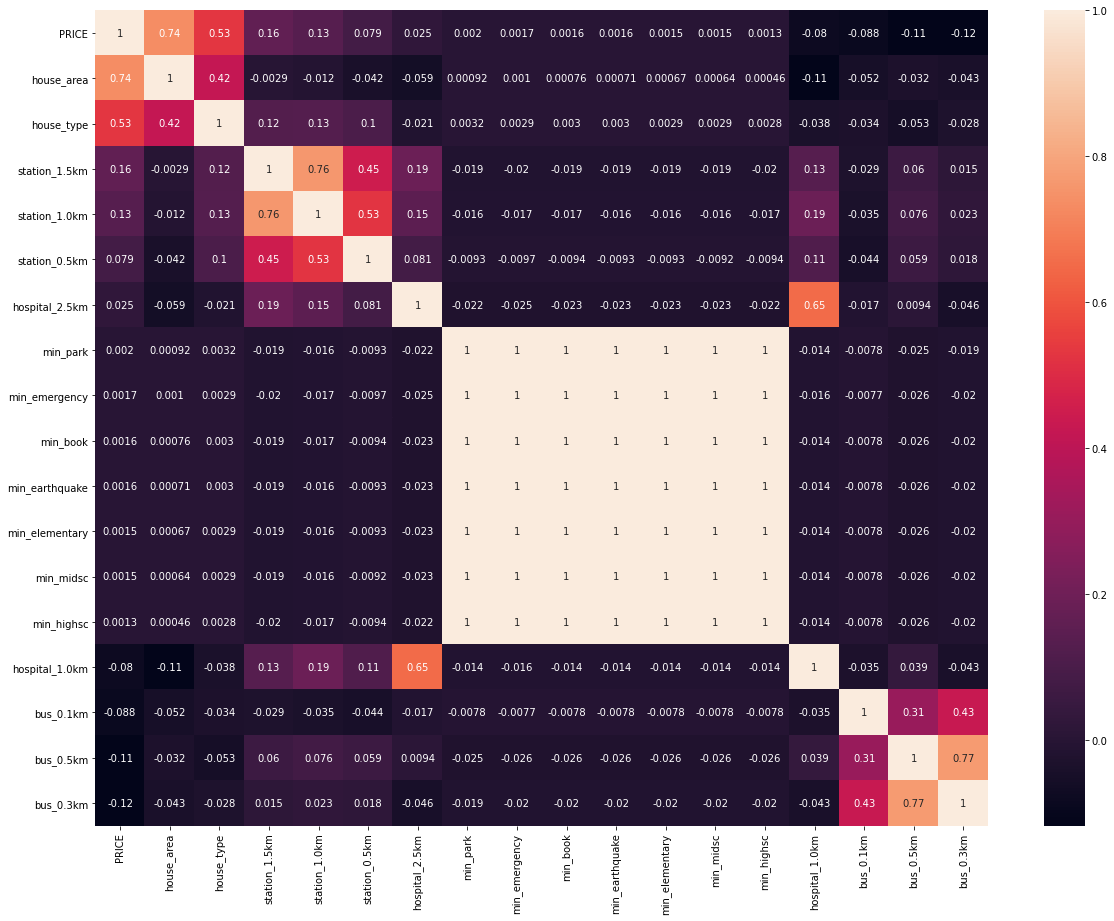

In [98]:
show_heatmap(datas)

- data 값을 보니까 튄게 몇 개 없어서 걍 지울거임.
- 유의미한 data는 2(km)이하인 듯

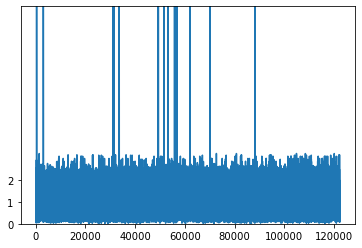

In [99]:
idx = 0
plt.ylim(0,10)
plt.yticks([0,1,2])
plt.plot(np.arange(len(datas.iloc[:,idx])), datas.iloc[:,idx])

- 분산이 예뻐졌음을 알 수 있음

In [100]:
# Remove outliers
filt = datas['min_park'] < 2
datas = datas[filt]
datas.describe()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,bus_0.3km,bus_0.5km,house_area,PRICE,house_type,station_0.5km,station_1.0km,station_1.5km
count,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,1.168160e+05,116816.000000,116816.000000,116816.000000,116816.000000
mean,0.943547,0.232244,0.373507,0.507487,0.680108,0.265561,1.414785,5.955554,28.791236,0.896341,8.071266,21.189743,53.446154,5.533087e+08,-0.123365,0.633740,1.554179,2.325238
std,0.425764,0.140202,0.185690,0.258058,0.388040,0.160265,0.784699,4.704921,13.968728,1.282853,4.630189,9.302288,28.983112,5.829098e+08,0.909580,0.753713,1.057493,1.343398
min,0.003000,0.000000,0.003000,0.009000,0.004000,0.002000,0.007000,0.000000,1.000000,0.000000,0.000000,0.000000,6.280000,2.500000e+07,-1.000000,0.000000,0.000000,0.000000
25%,0.620000,0.134000,0.238000,0.314000,0.384000,0.160000,0.832000,2.000000,20.000000,0.000000,5.000000,15.000000,30.460000,2.200000e+08,-1.000000,0.000000,1.000000,1.000000
50%,0.904000,0.210000,0.360000,0.484000,0.619500,0.237000,1.312000,5.000000,28.000000,0.000000,8.000000,20.000000,48.540000,3.345000e+08,0.000000,0.000000,1.000000,2.000000
75%,1.254000,0.301000,0.478000,0.656000,0.902000,0.340000,1.871000,9.000000,36.000000,2.000000,11.000000,27.000000,64.390000,7.000000e+08,1.000000,1.000000,2.000000,3.000000
max,1.999000,1.427000,1.923000,2.305000,4.203000,2.169000,5.696000,32.000000,113.000000,9.000000,32.000000,66.000000,489.790000,2.450000e+10,1.000000,5.000000,7.000000,8.000000


- hospital_2.5km data도 뭔가 이상한 것 같아서 쳐낼까 했는데 놔누기로 함.
- 사실 2.5km내에 병원이 100개인것도 뭔가 이상하기는 한데..

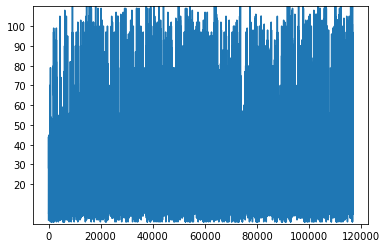

In [101]:
idx = 0
plt.ylim(0, 110)
plt.yticks([20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(np.arange(len(datas.loc[:,'hospital_2.5km'])),datas.loc[:,'hospital_2.5km'])

- 압구 가 있음. 제거 필요

In [102]:
filt = datas['town_name'] == "강남구', '압구"
datas[filt]

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,bus_0.3km,bus_0.5km,house_area,PRICE,house_type,station_0.5km,station_1.0km,station_1.5km,town_name
id,,,,,,,,,,,,,,,,,,,


# 2. Data 분석
## 2.1 Distribution of Target

- 우선 바뀐 heatmap을 먼저 보자
- 아까보다는 예뻐졌다.

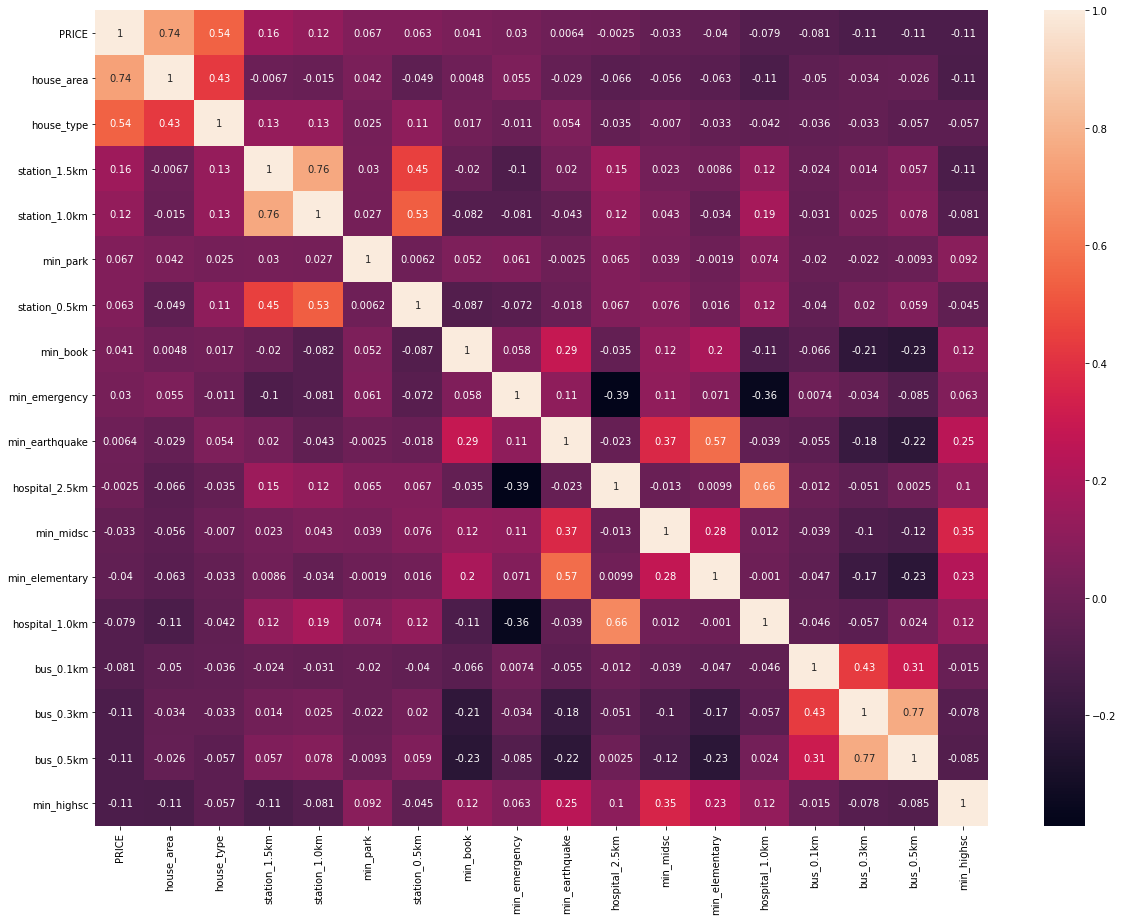

In [103]:
show_heatmap(datas)

### Skewness handling

In [104]:
# Right skewed data를 정규 분포에 가깝게 만든다.
# 각각 원본, log, coxbox

def show_skewness(target_col, datas=datas):
    figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(21,7)
    sns.distplot(datas[target_col], fit=norm, ax=ax1)
    sns.distplot(np.log(datas[target_col]+1), fit=norm, ax=ax2)
    sns.distplot(stats.boxcox(datas[target_col]+0.0001)[0], fit=norm, ax=ax3)

    print(f"Original skew: {datas[target_col].skew()}")
    print(f"Log skew: {np.log(datas[target_col]+1).skew()}")
    print(f"Coxbox skew: {pd.Series(stats.boxcox(datas[target_col]+0.0001)[0]).skew()}")

In [105]:
lmbda = stats.boxcox(datas['PRICE']+0.0001)[1]

Original skew: 4.392476609573868
Log skew: 0.44631454962795913
Coxbox skew: 0.03018942214657406


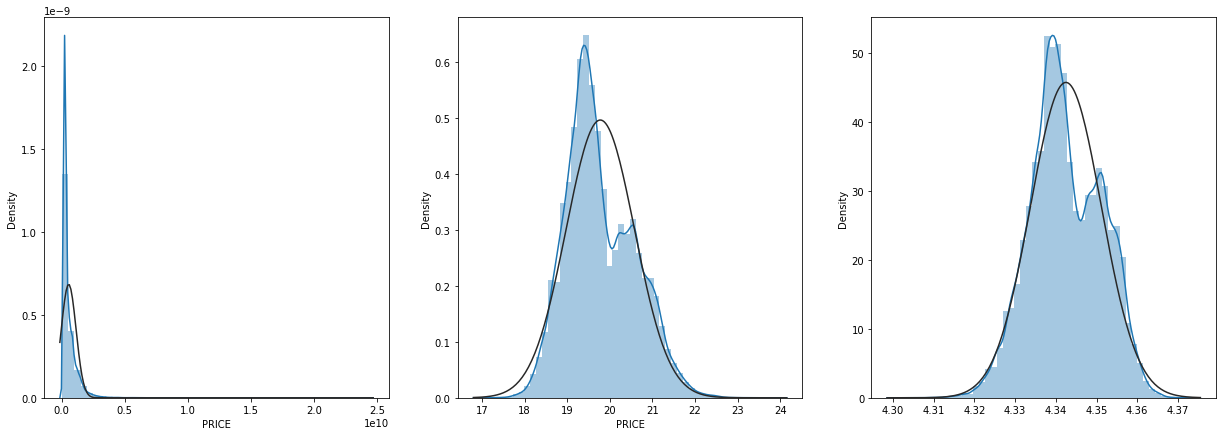

In [106]:
show_skewness('PRICE')

- 다른 최소거리 데이터들도 해보자.

Original skew: 0.27072214578060105
Log skew: -0.1505048737604715
Coxbox skew: -0.07736328667771714


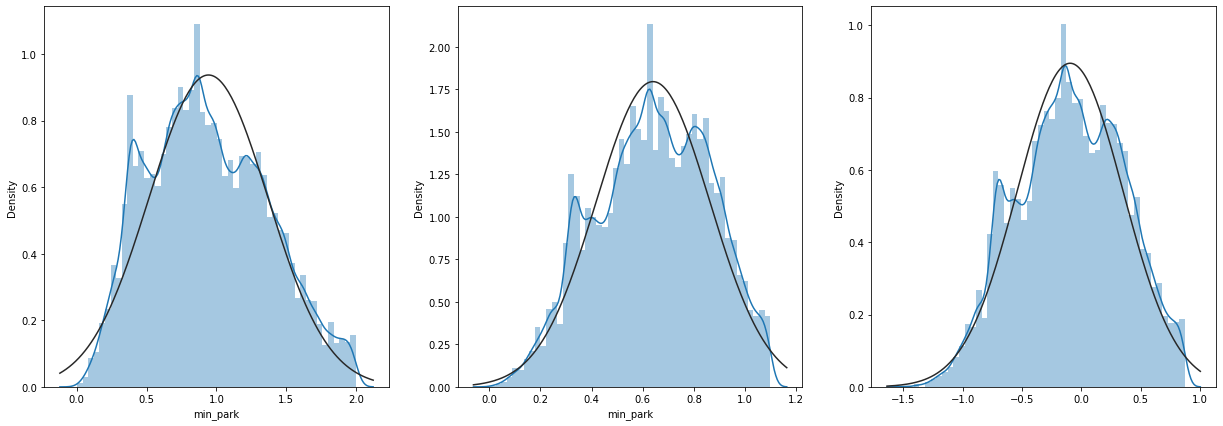

In [107]:
show_skewness('min_park')

Original skew: 0.9293919515289161
Log skew: 0.3495243356321187
Coxbox skew: -0.023850252694054507


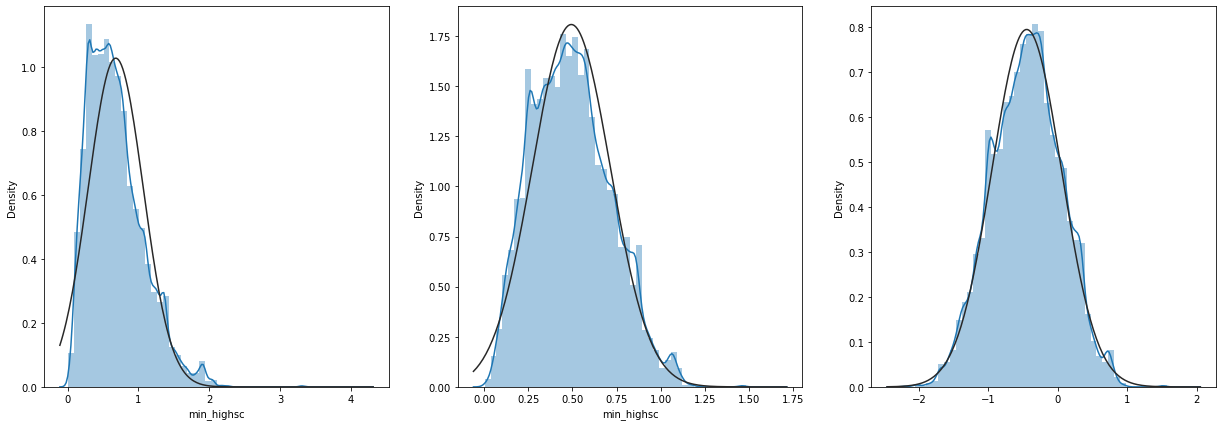

In [108]:
show_skewness('min_highsc')

- 범위 데이터들은 어떨까

Original skew: 0.7025211788465756
Log skew: -1.1855458596263988
Coxbox skew: -0.3852132960972165


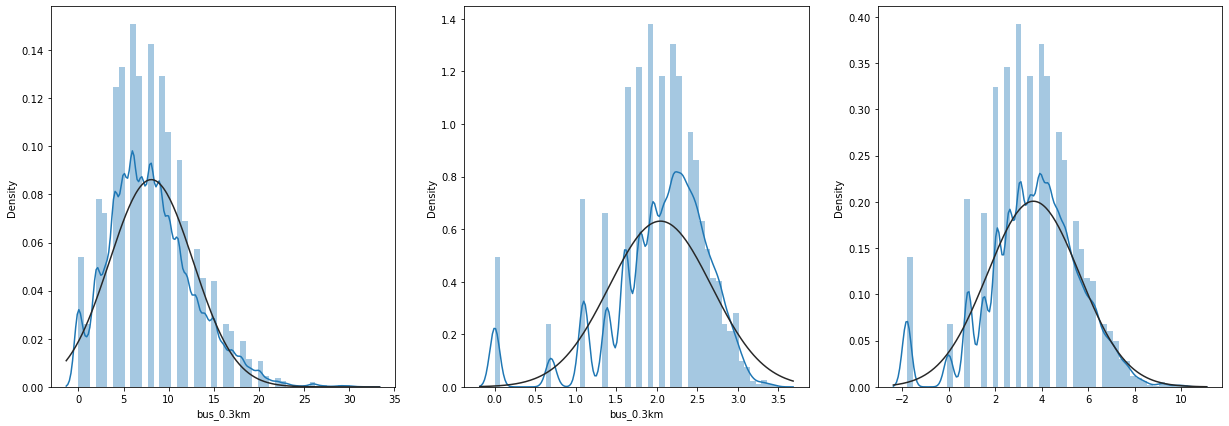

In [109]:
show_skewness('bus_0.3km')

Original skew: 1.0775688413461562
Log skew: -0.5813352228456089
Coxbox skew: -0.5923913720144444


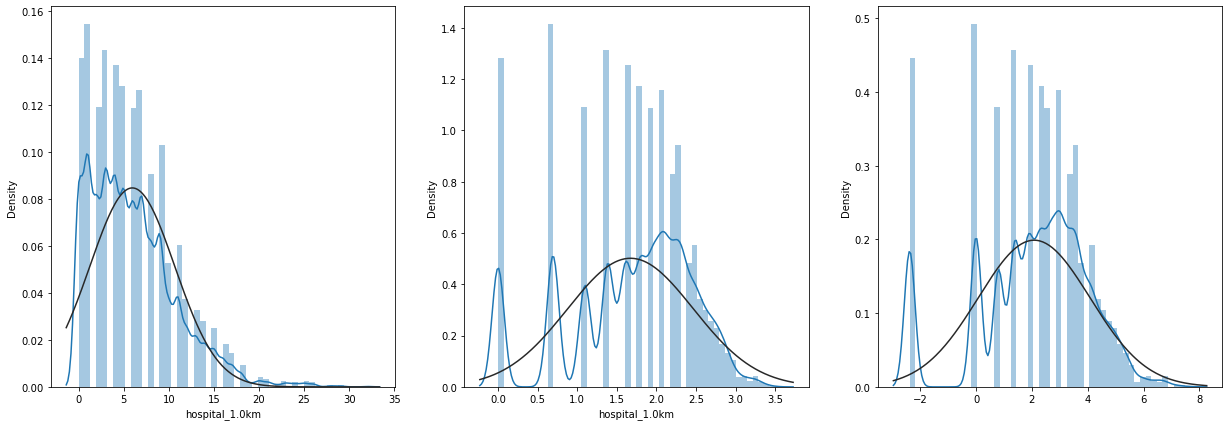

In [110]:
show_skewness('hospital_1.0km')

Original skew: 1.804542557615409
Log skew: -0.0007386700423497543
Coxbox skew: -0.000520251820116849


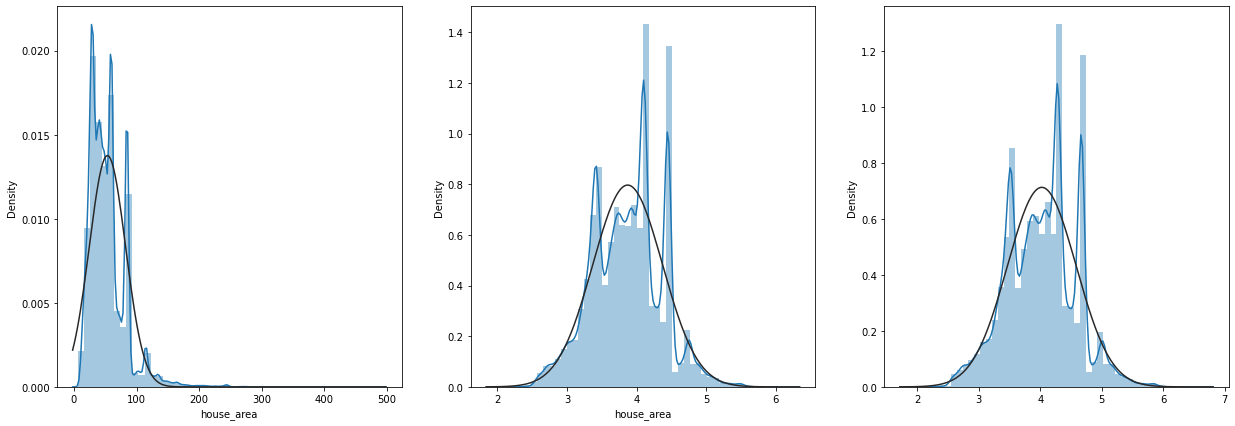

In [111]:
show_skewness('house_area')

## => 결론: 전반적으로 Coxbox가 skew향상 폭이 크다

## 2.2 Feature correlation

<AxesSubplot:xlabel='house_area', ylabel='PRICE'>

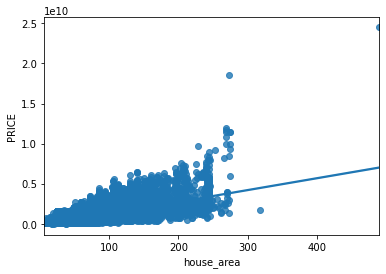

In [112]:
# 두번째로 큰 상관계수를 가진 'house_area' 의 그래프
sns.regplot(datas['house_area'], datas['PRICE']) # Outlier가 존재함

# 3. Preprocessing

## 3.1 Categorical Feature

- https://blog.naver.com/kkang2yah/222443464622
- 구 별 아파트 매매가로 동네 별 카테고리 설정

In [113]:
Town = datas['town_name']

In [114]:
Town = Town.replace(to_replace='강남구', value=1)
Town = Town.replace(to_replace='서초구', value=1)

Town = Town.replace(to_replace='강동구', value=2)
Town = Town.replace(to_replace='광진구', value=2)
Town = Town.replace(to_replace='동작구', value=2)
Town = Town.replace(to_replace='마포구', value=2)
Town = Town.replace(to_replace='성동구', value=2)
Town = Town.replace(to_replace='송파구', value=2)
Town = Town.replace(to_replace='용산구', value=2)
Town = Town.replace(to_replace='종로구', value=2)
Town = Town.replace(to_replace='중구', value=2)

Town = Town.replace(to_replace='강북구', value=3)
Town = Town.replace(to_replace='강서구', value=3)
Town = Town.replace(to_replace='관악구', value=3)
Town = Town.replace(to_replace='광진구', value=3)
Town = Town.replace(to_replace='구로구', value=3)
Town = Town.replace(to_replace='금천구', value=3)
Town = Town.replace(to_replace='노원구', value=3)
Town = Town.replace(to_replace='도봉구', value=3)
Town = Town.replace(to_replace='동대문구', value=3)
Town = Town.replace(to_replace='서대문구', value=3)
Town = Town.replace(to_replace='성북구', value=3)
Town = Town.replace(to_replace='양천구', value=3)
Town = Town.replace(to_replace='영등포구', value=3)
Town = Town.replace(to_replace='은평구', value=3)
Town = Town.replace(to_replace='중랑구', value=3)


In [117]:
datas['town_name'] = Town

In [118]:
# 원핫 인코딩 한다
data_encoded=pd.get_dummies(datas['house_type'], prefix='house_type')
datas=pd.merge(datas, data_encoded, on='id')
datas=datas.drop(columns='house_type')

In [119]:
data_encoded=pd.get_dummies(datas['town_name'], prefix='town_name')
datas=pd.merge(datas, data_encoded, on='id')
datas=datas.drop(columns='town_name')

In [128]:
datas.iloc[:,:-3]

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,bus_0.3km,bus_0.5km,house_area,PRICE,station_0.5km,station_1.0km,station_1.5km,house_type_-1,house_type_0,house_type_1
id,,,,,,,,,,,,,,,,,,,,
0,1.741,0.390,0.373,0.815,0.506,0.386,3.173,1,2,1,11,23,90.30,560000000,0,0,0,1,0,0
1,0.413,0.300,0.308,0.159,0.146,0.269,1.278,3,36,0,6,21,54.70,700000000,1,4,5,0,0,1
2,0.555,0.140,0.554,0.505,0.505,0.172,1.010,13,38,3,11,22,17.88,112000000,3,4,5,0,1,0
3,0.740,0.063,0.396,0.101,0.233,0.116,0.579,6,17,3,15,38,84.93,1950000000,1,3,5,0,0,1
4,0.992,0.111,0.526,0.977,1.070,0.252,2.493,0,12,0,11,29,60.06,380000000,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122479,1.091,0.103,0.158,0.566,0.551,0.222,2.979,4,11,0,6,13,58.48,450000000,0,1,1,1,0,0
122480,0.803,0.097,0.413,0.611,0.508,0.430,4.816,0,5,2,17,26,59.51,600000000,0,1,1,0,1,0
122481,0.420,0.237,0.302,0.665,0.417,0.222,3.306,5,9,4,8,15,59.99,1450000000,0,1,1,0,0,1


## 3.2 Numeric Feature

In [132]:
skew_fixed_datas = datas.apply(lambda col: stats.boxcox(col+0.0001)[0], axis=0)

In [133]:
skew_fixed_datas.describe()

,min_park,min_book,min_elementary,min_midsc,min_highsc,min_earthquake,min_emergency,hospital_1.0km,hospital_2.5km,bus_0.1km,...,PRICE,station_0.5km,station_1.0km,station_1.5km,house_type_-1,house_type_0,house_type_1,town_name_1,town_name_2,town_name_3
count,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,...,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000,116816.000000
mean,-0.094716,-1.170538,-0.825050,-0.634101,-0.449562,-1.160180,0.271066,2.079245,7.794671,-7.815741,...,4.342477,-4.680177,0.262354,0.937735,-5.284450,-656.108837,-16.242765,-411673.086934,-34.836565,-1.675712
std,0.445801,0.337346,0.311430,0.377258,0.501988,0.376159,0.656575,2.005096,2.281271,7.303832,...,0.008713,4.832252,1.035369,0.946163,5.107402,283.632373,12.171394,117004.783043,22.520615,2.189186
min,-1.509225,-2.462160,-1.948428,-1.904953,-2.315409,-2.742136,-2.004894,-2.378020,0.000100,-14.163545,...,4.301074,-9.478061,-2.035211,-1.821379,-10.220599,-778.720540,-25.363174,-444927.634030,-49.395185,-4.535515
25%,-0.411078,-1.386202,-1.036224,-0.894824,-0.803011,-1.396402,-0.176517,0.802022,6.497571,-14.163545,...,4.336544,-9.478061,0.000100,0.000100,-10.220599,-778.720540,-25.363174,-444927.634030,-49.395185,-4.535515
50%,-0.097599,-1.164248,-0.806821,-0.615505,-0.437900,-1.160187,0.288651,2.281379,7.959589,-14.163545,...,4.341581,-9.478061,0.000100,0.842443,-10.220599,-778.720540,-25.363174,-444927.634030,-49.395185,0.000100
75%,0.243837,-0.955600,-0.621093,-0.382618,-0.101051,-0.916215,0.722127,3.569575,9.210561,0.672572,...,4.349368,0.000100,0.824184,1.504721,0.000100,-778.720540,0.000100,-444927.634030,0.000100,0.000100
max,0.873893,0.381873,0.768584,1.021049,1.906261,0.875545,2.621719,7.676985,17.168786,1.998734,...,4.372969,1.601464,3.239128,3.866037,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100


- heapmap은 뭔가 변화가 있긴 한데 미미함..

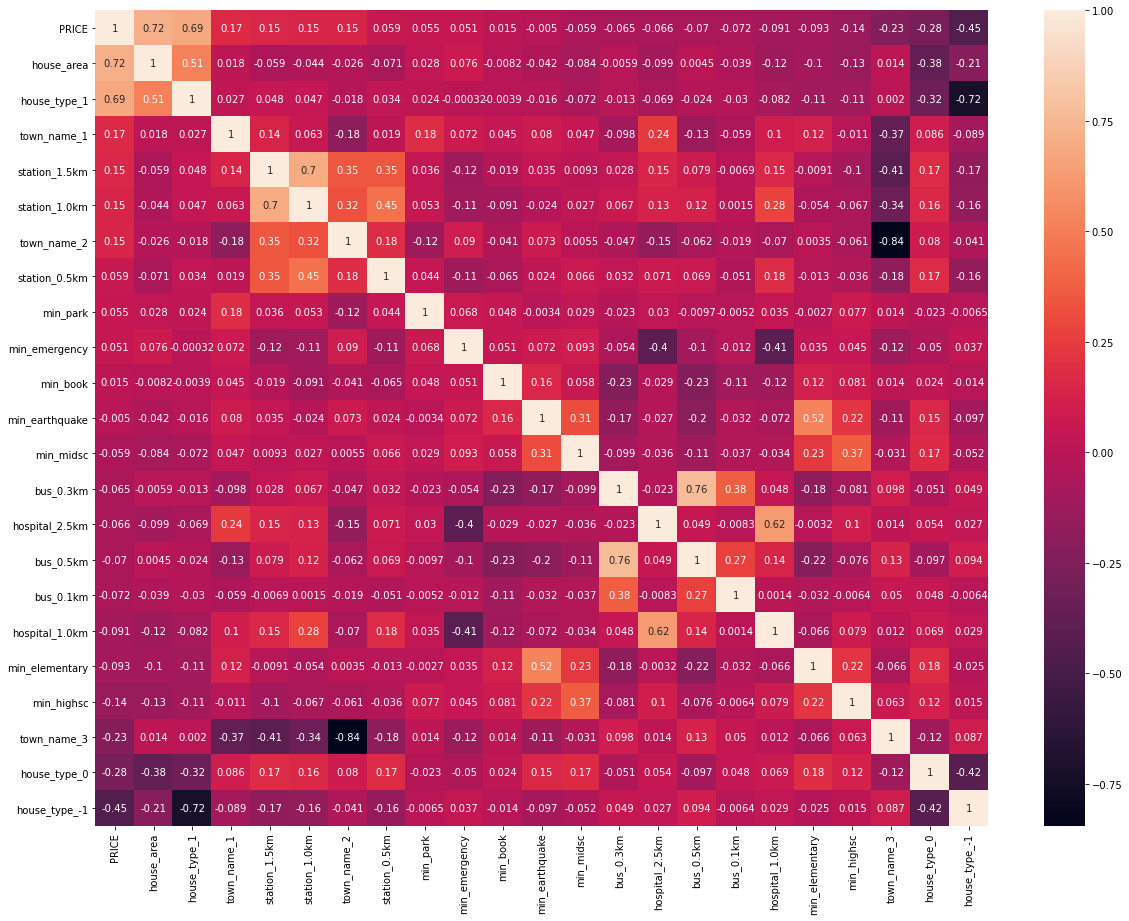

In [134]:
show_heatmap(skew_fixed_datas)

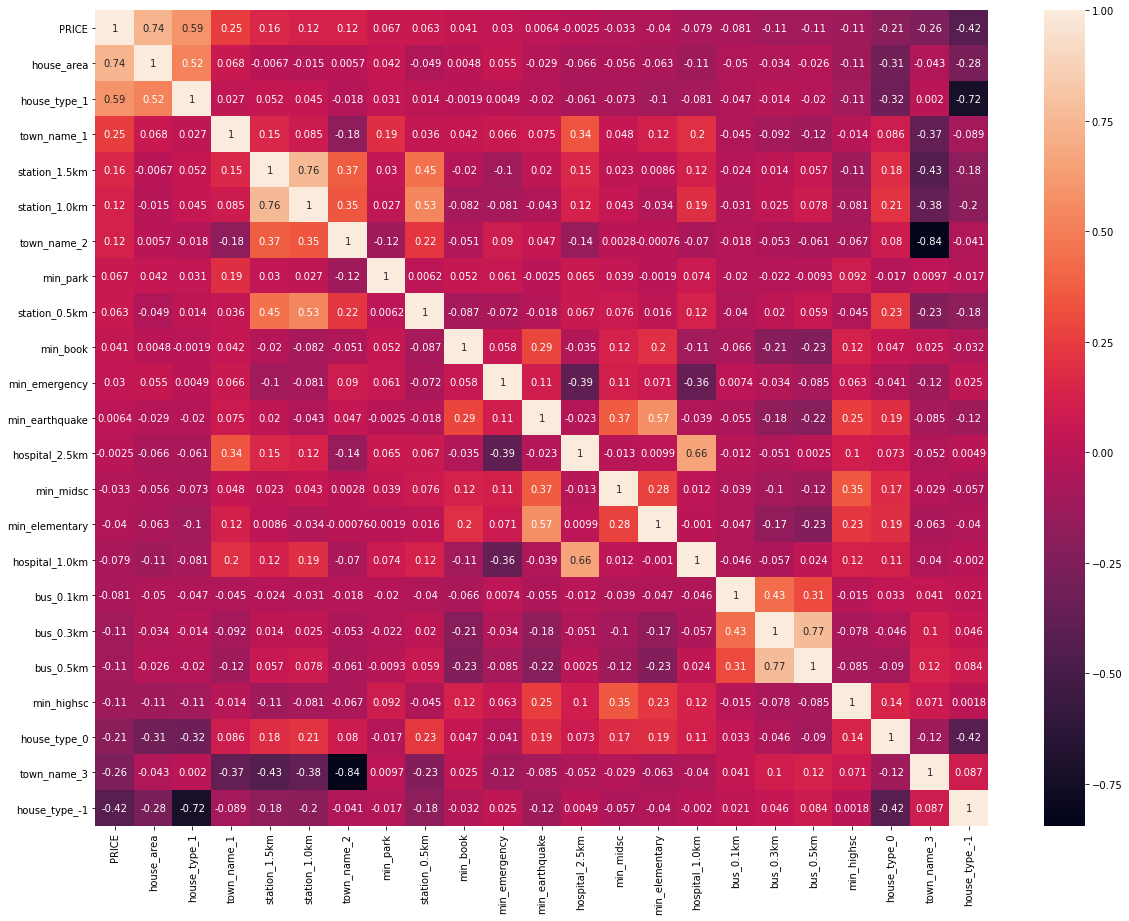

In [135]:
show_heatmap(datas)

## 3.3 Train test split

In [136]:
X = skew_fixed_datas.drop(columns = ['PRICE'])
y = skew_fixed_datas['PRICE']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.1, random_state = 77)

# 4. Training

In [137]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor

import time
#!pip3 install optuna
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                         min_samples_split=10, loss='huber', random_state=18)

model_XGB=XGBRegressor(colsample_bylevel=0.9229733609038979,colsample_bynode=0.21481791874780318,colsample_bytree=0.607964318297635, 
                       gamma=0.8989889254961725, learning_rate=0.009192310189734834, max_depth=3, n_estimators=3602, 
                       reg_alpha=3.185674564163364e-12,reg_lambda=4.95553539265423e-13, seed=18, subsample=0.8381904293270576,
                       tree_method='gpu_hist',verbosity=0)

## Train by skew fixed features

In [138]:
model_Lasso.fit(Xtrain, Ytrain)
Lasso_predictions=model_Lasso.predict(Xtest)
train_Lasso=model_Lasso.predict(Xtrain)

model_ENet.fit(Xtrain, Ytrain)
ENet_predictions=model_ENet.predict(Xtest)
train_ENet=model_ENet.predict(Xtrain)

model_XGB.fit(Xtrain, Ytrain)
XGB_predictions=model_XGB.predict(Xtest)
train_XGB=model_XGB.predict(Xtrain)

model_GBoost.fit(Xtrain, Ytrain)
GBoost_predictions=model_GBoost.predict(Xtest)
train_GBoost=model_GBoost.predict(Xtrain)

boxcox_train_predictions = (train_Lasso + train_ENet + train_XGB + train_GBoost)/4
train_score=np.sqrt(mean_squared_error(Ytrain, boxcox_train_predictions))
print(f"Scoring with train data : {train_score}")

boxcox_predictions=(Lasso_predictions + ENet_predictions + XGB_predictions + GBoost_predictions) / 4

Scoring with train data : 0.004401196757557535


In [139]:
predictions=special.inv_boxcox(boxcox_predictions, lmbda)

# 5. Test

In [140]:
X = datas.drop(columns = ['PRICE'])
y = datas['PRICE']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.1, random_state = 77)

In [141]:
Ytest_list = Ytest.values
np.mean(Ytest_list-predictions)

108014260.84004247

In [142]:
np.sqrt(mean_squared_error(Ytest_list, predictions))

355082729.1119771

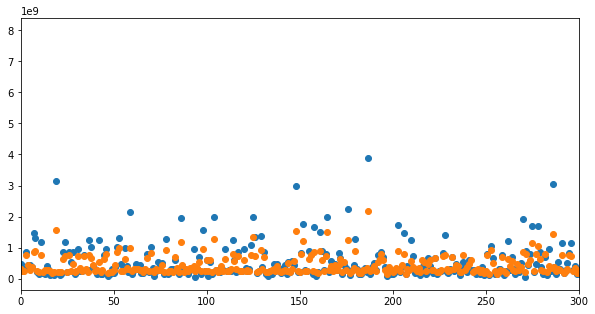

In [143]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 300)
plt.scatter(np.arange(len(Ytest)), Ytest_list)
plt.scatter(np.arange(len(Ytest)), predictions)

## Train by skew not-fixed datas

In [144]:
boxcox_price, new_lmbda = stats.boxcox(datas['PRICE']+1)

X = datas.drop(columns = ['PRICE'])
y = pd.Series(boxcox_price)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.1, random_state = 77)

In [145]:
model_Lasso.fit(Xtrain, Ytrain)
Lasso_predictions=model_Lasso.predict(Xtest)
train_Lasso=model_Lasso.predict(Xtrain)

model_ENet.fit(Xtrain, Ytrain)
ENet_predictions=model_ENet.predict(Xtest)
train_ENet=model_ENet.predict(Xtrain)

model_XGB.fit(Xtrain, Ytrain)
XGB_predictions=model_XGB.predict(Xtest)
train_XGB=model_XGB.predict(Xtrain)

model_GBoost.fit(Xtrain, Ytrain)
GBoost_predictions=model_GBoost.predict(Xtest)
train_GBoost=model_GBoost.predict(Xtrain)

boxcox_train_predictions = (train_Lasso + train_ENet + train_XGB + train_GBoost)/4
train_score=np.sqrt(mean_squared_error(Ytrain, boxcox_train_predictions))
print(f"Scoring with train data : {train_score}")

boxcox_predictions=(Lasso_predictions + ENet_predictions + XGB_predictions + GBoost_predictions) / 4


Scoring with train data : 0.004534244713583889


In [152]:
predictions=special.inv_boxcox(boxcox_predictions, new_lmbda)
X = datas.drop(columns = ['PRICE'])
y = datas['PRICE']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.1, random_state = 77)

Ytest_list = Ytest.values
np.mean(Ytest_list-predictions)

100160045.96205717

In [153]:
np.sqrt(mean_squared_error(Ytest_list, predictions))

359022588.4819439

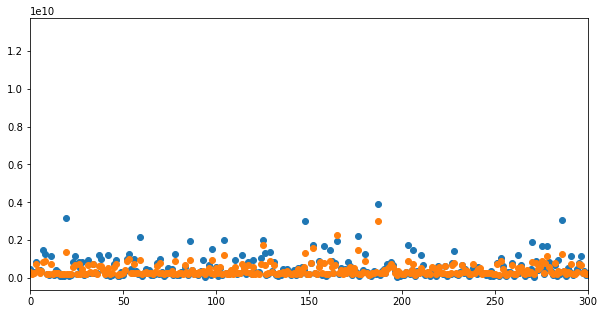

In [154]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 300)
plt.scatter(np.arange(len(Ytest)), Ytest_list)
plt.scatter(np.arange(len(Ytest)), predictions)